### Importação dos dados



In [9]:
import pandas as pd
import matplotlib.pyplot as plt

loja = pd.read_csv('loja_1.csv', na_values='?') # na_values='?' mostra informações faltantes
loja2 = pd.read_csv('loja_2.csv', na_values='?')
loja3 = pd.read_csv('loja_3.csv', na_values='?')
loja4 = pd.read_csv('loja_4.csv', na_values='?')

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
# Concatenando os dados das lojas
lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Quantidade de categorias únicas
num_categorias = lojas['Categoria do Produto'].nunique()
print(f"Número de categorias únicas: {num_categorias}")

# Quantidade de produtos únicos
num_produtos = lojas['Produto'].nunique()
print(f"Número de produtos únicos: {num_produtos}")

#Quantidade de Estados únicos
num_estados = lojas['Local da compra'].nunique()
print(f"Número de estados únicos: {num_estados}")

Número de categorias únicas: 8
Número de produtos únicos: 51
Número de estados únicos: 27


# 2. Vendas por Categoria


In [16]:
# Calculando o número de vendas por categoria
vendas_por_categoria = lojas['Categoria do Produto'].value_counts().reset_index()

# Ajustando o índice para começar em 1
vendas_por_categoria.index = vendas_por_categoria.index + 1

# Exibindo o resultado
display(vendas_por_categoria)

,Categoria do Produto,count
1,moveis,1886
2,eletronicos,1772
3,brinquedos,1290
4,eletrodomesticos,1149
5,esporte e lazer,1113
6,instrumentos musicais,753
7,livros,742
8,utilidades domesticas,730


# 3. Média de Avaliação das Lojas

In [5]:
# Calculando a média da coluna "Avaliação da Compra"
media_avaliacao = lojas['Avaliação da compra'].mean()

# Exibindo a média com duas casas decimais
print(f"Média da Avaliação da Compra: {media_avaliacao:.2f}")

Média da Avaliação da Compra: 4.01


# 4. Produtos Mais e Menos Vendidos

In [6]:
# Produto mais vendido
produto_mais_vendido = lojas['Produto'].value_counts().idxmax() # Obtendo o nome do produto mais vendido

quantidade_mais_vendido = lojas['Produto'].value_counts().max() # Obtendo a quantidade de vendas do produto mais vendido

print(f"Produto mais vendido: {produto_mais_vendido} ({quantidade_mais_vendido} vendas)")

Produto mais vendido: Cômoda (210 vendas)


In [7]:
# Produto menos vendido
produto_menos_vendido = lojas['Produto'].value_counts().idxmin()  # Obtendo o nome do produto menos vendido

quantidade_menos_vendido = lojas['Produto'].value_counts().min()  # Obtendo a quantidade de vendas do produto menos vendido

print(f"Produto menos vendido: {produto_menos_vendido} ({quantidade_menos_vendido} vendas)")

Produto menos vendido: Celular ABXY (157 vendas)


# 5. Frete Médio por Loja


In [8]:
frete_medio_loja1 = loja['Frete'].mean()  # Média de frete da loja 1
frete_medio_loja2 = loja2['Frete'].mean()  # Média de frete da loja 2
frete_medio_loja3 = loja3['Frete'].mean()  # Média de frete da loja 3
frete_medio_loja4 = loja4['Frete'].mean()  # Média de frete da loja 4

# Por algum motivo a coluna de Frete está com várias casas decimais, então vamos arredondar para duas casas decimais
print(f"Média de frete da loja 1 R$ {frete_medio_loja1:.2f}")
print(f"Média de frete da loja 2 R$ {frete_medio_loja2:.2f}")
print(f"Média de frete da loja 3 R$ {frete_medio_loja3:.2f}")
print(f"Média de frete da loja 4 R$ {frete_medio_loja4:.2f}")

Média de frete da loja 1 R$ 34.69
Média de frete da loja 2 R$ 33.62
Média de frete da loja 3 R$ 33.07
Média de frete da loja 4 R$ 31.28


<span style="font-size:40px">Gráfico de barras para Vendas por Categoria (Primeira Métrica)</span>

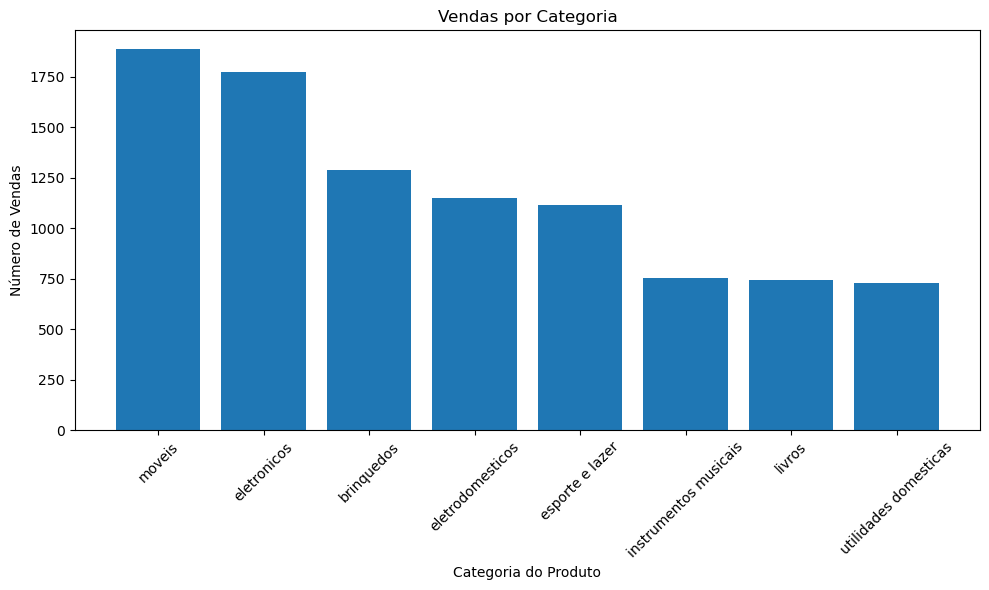

In [17]:
plt.figure(figsize=(10,6))
plt.bar(vendas_por_categoria['Categoria do Produto'], vendas_por_categoria['count'])
plt.xlabel('Categoria do Produto')
plt.ylabel('Número de Vendas')
plt.title('Vendas por Categoria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<span style="font-size:36px">Gráfico de pizza para Média de Avaliação das Lojas (Segunda Métrica)</span>

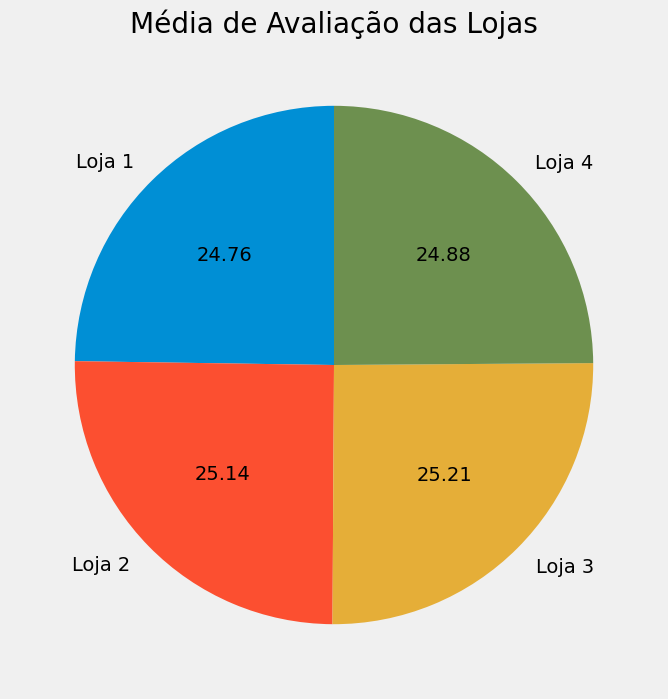

In [20]:
# Gráfico de pizza para Média de Avaliação das Lojas

# Calculando a média de avaliação por loja
media_avaliacao_lojas = [
    loja['Avaliação da compra'].mean(),
    loja2['Avaliação da compra'].mean(),
    loja3['Avaliação da compra'].mean(),
    loja4['Avaliação da compra'].mean()
]
labels = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

plt.figure(figsize=(8,8))
plt.pie(media_avaliacao_lojas, labels=labels, autopct='%1.2f', startangle=90)
plt.title('Média de Avaliação das Lojas')
plt.show()

<span style="font-size:36px">Gráfico de Linhas para o Frete Médio por Loja (Terceira Métrica)</span>

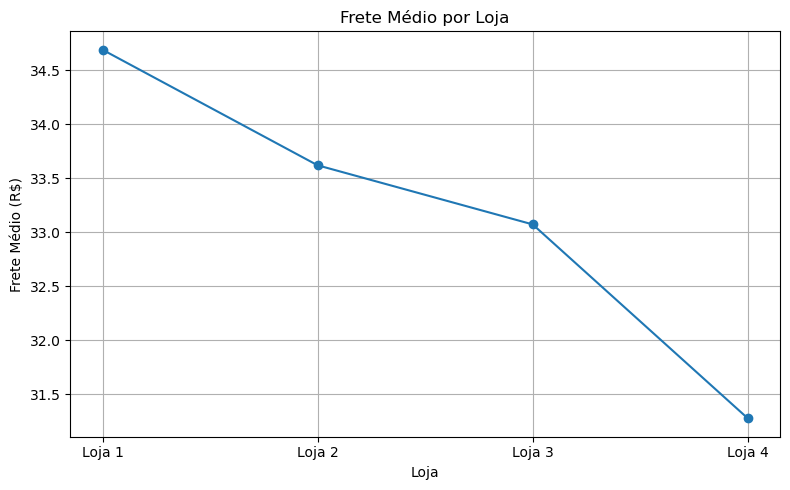

In [28]:
# Lista com as médias de frete de cada loja
fretes_medios = [
    loja['Frete'].mean(),
    loja2['Frete'].mean(),
    loja3['Frete'].mean(),
    loja4['Frete'].mean()
]
labels = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

plt.figure(figsize=(8,5))
plt.plot(labels, fretes_medios, marker='o')
plt.title('Frete Médio por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio (R$)')
plt.grid(True)
plt.tight_layout(w_pad=50.0)
plt.show()

# _________________________________________________________________________________________________________________________________________________________________________________________

<span style="font-size:36px">Relatório de Vendas</span>

In [96]:
# Quantidade de vendas de cada loja de acordo com a coluna "Produto"
quantidade_vendas_loja1 = loja['Produto'].count()
print(f"A loja 1 realizou {quantidade_vendas_loja1} vendas.")

quantidade_vendas_loja2 = loja2['Produto'].count()
print(f"A loja 2 realizou {quantidade_vendas_loja2} vendas.")

quantidade_vendas_loja3 = loja3['Produto'].count()
print(f"A loja 3 realizou {quantidade_vendas_loja3} vendas.")

quantidade_vendas_loja4 = loja4['Produto'].count()
print(f"A loja 4 realizou {quantidade_vendas_loja4} vendas.")


A loja 1 realizou 2359 vendas.
A loja 2 realizou 2359 vendas.
A loja 3 realizou 2359 vendas.
A loja 4 realizou 2358 vendas.


In [53]:
# Descobrindo a loja com maior número de vendas
vendas_lojas = {
    'Loja 1': len(loja),
    'Loja 2': len(loja2),
    'Loja 3': len(loja3),
    'Loja 4': len(loja4)
}

loja_mais_vendas = max(vendas_lojas, key=vendas_lojas.get) # "get" retorna o maior valor, ao invés de maior chave (nome da loja)
loja_mais_vendas

'Loja 1'

In [71]:
# Maior quantidade de itens vendidos na loja 1

mais_vendidos_loja1 = loja['Produto'].value_counts()

print(f"A loja com maior número de vendas é: {loja_mais_vendas} ({vendas_lojas[loja_mais_vendas]} vendas)\n")

print(f"A ordem dos itens mais vendidos na loja 1 é: {mais_vendidos_loja1}")

A loja com maior número de vendas é: Loja 1 (2359 vendas)

A ordem dos itens mais vendidos na loja 1 é: Produto
TV Led UHD 4K                  60
Guarda roupas                  60
Micro-ondas                    60
Secadora de roupas             58
Blocos de montar               56
Cômoda                         56
Bola de basquete               55
Copo térmico                   54
Impressora                     54
Bicicleta                      54
Geladeira                      54
Bateria                        53
Faqueiro                       52
Carrinho controle remoto       52
Modelagem preditiva            51
Fone de ouvido                 50
Celular Plus X42               49
Xadrez de madeira              49
Lava louças                    48
Lavadora de roupas             47
Guitarra                       47
Violão                         46
Sofá retrátil                  46
Cadeira de escritório          46
Fogão                          45
Kit banquetas                  44
Cama

<span style="font-size:36px">Se a tendência de vendas continuar de acordo com os dados analisados entre as quatro lojas, pode ser que seja mais proveitoso para o Vendedor João Souza, encontrar uma vaga na Loja 1 e focar nos itens TV de Led, Guarda roupas e Micro-ondas.</span>

# ___________________________________________________________________________________________________________________________________________________________________________________

<span style="font-size:36px">Análise de Desempenho Geográfico.</span>

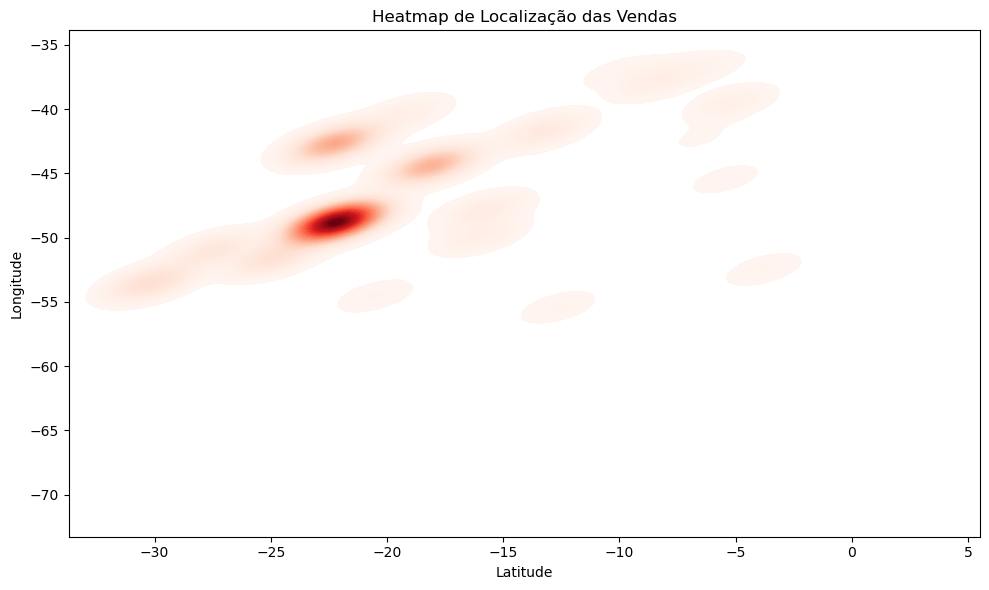

In [79]:
# Heatmap de localização das vendas usando latitude e longitude

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=lojas,
    x='lat',
    y='lon',
    fill=True,
    cmap='Reds',
    thresh=0.05,
    levels=100
)
plt.title('Heatmap de Localização das Vendas')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.tight_layout(w_pad=100.0)
plt.show()

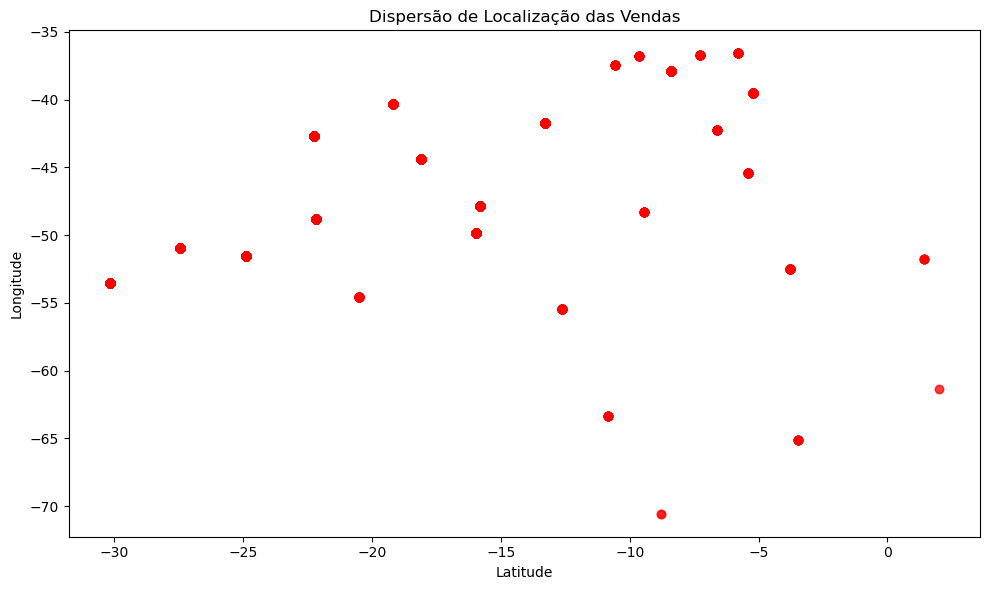

In [81]:
# Gráfico de dispersão (scatter plot) para localização das vendas usando latitude e longitude

plt.figure(figsize=(10, 6))
plt.scatter(lojas['lat'], lojas['lon'], alpha=0.5, c='red')
plt.title('Dispersão de Localização das Vendas')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.tight_layout(w_pad=100.0)
plt.show()

<span style="font-size:22px">Ao analisar os gráficos de dispersão e heatmap utilizando latitude (lat) e longitude (lon), é possível identificar regiões com maior ou menor concentração de vendas. Se segmentarmos os dados por loja e plotarmos cada uma em cores diferentes, veremos que algumas lojas têm maior presença em determinadas áreas geográficas, enquanto outras têm desempenho inferior nessas mesmas regiões. Isso indica que o desempenho das lojas pode variar conforme a localização dos clientes.</span>

_______________